# 1. Introduction

| Variable | Predicted | Variable of interest | Confounding variable |
|----------|-----------|----------------------|----------------------|
| crmrte   | X         | -                    | -                    |
| prbarr   | -         | X                    | -                    |
| prbconv  | -         | X                    | -                    |
| prbpris  | -         | X                    | -                    |
| avgsen   | -         | X                    | -                    |
| polpc    | -         | X                    | -                    |
| density  | -         | -                    | X                    |
| taxpc    | -         | -                    | X                    |
| west     | -         | -                    | X                    |
| central  | -         | -                    | X                    |

# 2. Exploratory Data Analysis

## 2.1. Import libraries and dataset

In [178]:
library(dplyr)
library(corrplot)
library(car)
library(stargazer)
crime <- read.csv('crime_v2.csv')

Warning message:
"package 'car' was built under R version 3.4.4"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.4.4"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

Warning message:
"package 'stargazer' was built under R version 3.4.4"
Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



## 2.2. Data cleaning and univariate analysis

### First stage

Main findings:

- Dataset contains 91 out of 100 counties in North Carolina. Even though it contains most of the counties, we do not have information on the sampling regime used to select the counties in this dataset and cannot assume that the sample is random. This implies that we need to treat this data as representative of our population of interest: counties in North Carolina.
- All numerical/integer variables have 6 blank observations. We need to investigate later if they belong to the same six observations.
- `year`: useful to provide context to results but it is not relevant since it doesn't vary.
- `prbarr`: has at least one value larger than 1.
- `prbconv` is a factor when it should be an integer. It has at least one non-numerical value (\`).
- `density`: given that the density of North Carolina between 1980 and 1990 ranged from 120.9 to 136.4 [US Census, 2018](https://www.census.gov/population/www/censusdata/density.html), values seem to be very small. We need to further investigate the reason for these unusually small values.
- `west` and `central`: are these the only two divisions? check if all counties are categorized in one (and only one) of these two?
- `urban`: the definition of urban according to whether the county is categorized as a Standard metropolitan statistical area (SMSA) is ambiguous for our purposes. According to the US Census, a SMSA is "a geographic entity defined by the federal Office of Management and Budget for use by federal statistical agencies". Furthermore, according to the Wikipedia entry of this kind of entity, "such regions are neither legally incorporated as a city or town would be, nor are they legal administrative divisions like counties or separate entities such as states; because of this, the precise definition of any given metropolitan area can vary with the source". Therefore, incorporating this variable into our model would not let give us information about either the relationship that is being modeled or the factors that are being controlled for.
- `mix`: This definition is also ambiguous since it is not clear what face-to-face offences mean and it is also not clear how some of the plausible interpretations of this variable could be of interest to solve our research question.
- All other variables not mentioned seem to be within reasonable ranges and do not have unusually high concentration of values.

In [33]:
length(unique(crime$county))

[1] 91

In [31]:
str(crime)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

In [32]:
summary(crime)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

Upon closer inspection of incomplete cases, we found that indeed the six blank values for all the variables but `prbconv` come from the same six observations. Furthermore, the value '\`' included in `prbconv` comes from one of these observations. Then, we deleted these observations

In [35]:
# 6 observations are empty
options(repr.matrix.max.rows=10,repr.matrix.max.cols=200)
crime[!complete.cases(crime), ]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [36]:
# Remove empty cases
clean <- crime[complete.cases(crime), ]

### Second stage

Following the superficial analysis of the dataset, we proceed to dig deeper into the possible quality issues found and to explore the main features of our variables of interest and control variables.

#### Variables of interest

##### County

We found two observations with the same `county` value (county 193). Upon closer inspection, we found that both observations contain the exact same data, then proceeded to remove one of the observations.

In [37]:
# One duplicated county (remove)
paste("Unique county identifier:", nrow(clean) == length(unique(clean$county)))
paste("Duplicated county id:", clean$county[duplicated(clean$county) & !is.na(clean$county)])
subset(clean, subset = clean$county == 193)
clean <- clean[!duplicated(clean$county), ]

[1] "Unique county identifier: FALSE"

[1] "Duplicated county id: 193"

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
88,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,1,0,0,5.93109,285.8289,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,1,0,0,5.93109,285.8289,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


##### Crime rate

`crmrte` values are within a reasonable range and there are no concentrations around specific values that would lead us to suspect measurement errors. Therefore, it is not necessary to clean this variable up and we will leave it unchanged.

In [86]:
summary(clean$crmrte)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005533 0.020604 0.030002 0.033510 0.040249 0.098966 

The distribution of `crmrte` is positively skewed. Even though its range is not particularly large (about an order of magnitude), its skewness is also not particularly worrying to grant doing additional transformations and the number of observations (90) allows us to rely on the CLT, it is important to notice that the `log(crmrte)` has a distribution that is closer to normal. Therefore, we will explore the usefulness of including this transformation in follow up analyses.

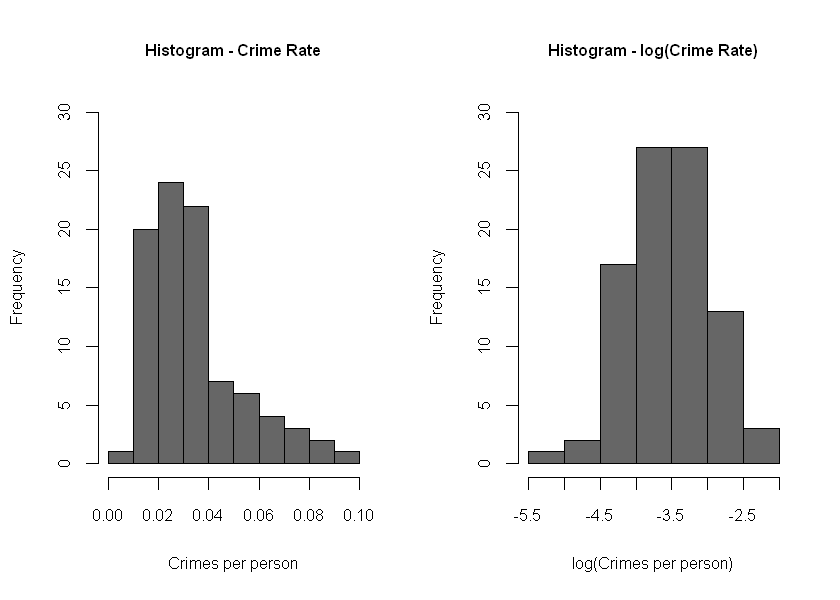

In [376]:
par(mfrow = c(1, 2), cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.8)
options(repr.plot.width=7, repr.plot.height=5)
hist(clean$crmrte, main = "Histogram - Crime Rate", col = rgb(0.4, 0.4, 0.4, 1), ylim = c(0, 30), xlab = "Crimes per person",
     breaks = sqrt(nrow(clean)))
hist(log(clean$crmrte), main = "Histogram - log(Crime Rate)", col = rgb(0.4, 0.4, 0.4, 1), ylim = c(0, 30), 
     xlab = "log(Crimes per person)", breaks = sqrt(nrow(clean)))

In [99]:
# Check for concentration of values
freqs.crmrte <- data.frame(table(clean$crmrte))
paste("Repeated values:", 
      length(freqs.crmrte$Freq[freqs.crmrte$Freq > 1]))

[1] "Repeated values: 0"

##### Prbarr

There is one value higher than 1. This is atypical but we cannot be sure that it is a error since we don't have enough information about how this variable is defined. Specifically, there are possible definitions of this variable or county characteristics under which a value higher than 1 is possible. For example, 

$$prbarr = \frac{\text{arrests_in_period_t}}{\text{crimes_in_period_t}}$$.

Under this definition, arrests in period t correspond both to crimers committed in period $t$ but also in $t-i$ since there is a lag between the time that a crime is committed and the time when the arrest is made, that could span for more than one period. For example, it is possible that after a period $t-1$ with an unusually high number of crimes followed by a period $t$ with unusually low number of crimes the number of arrests in $t$ is higher than the number of crimes in $t$, since many of the arrests in $t$ may come from the number of crimes committed in $t-1$.

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle,log.crmrte,log.taxpc,prbconv.inv,crmrte.log
51,115,87,0.0055332,1.09091,1.5,0.5,20.7,0.00905433,0.3858093,28.1931,1,0,0,1.28365,204.2206,503.2351,217.4908,342.4658,245.2061,448.42,442.2,340.39,386.12,0.1,0.07253495,-5.196989,3.339077,0.6666667,-5.196989


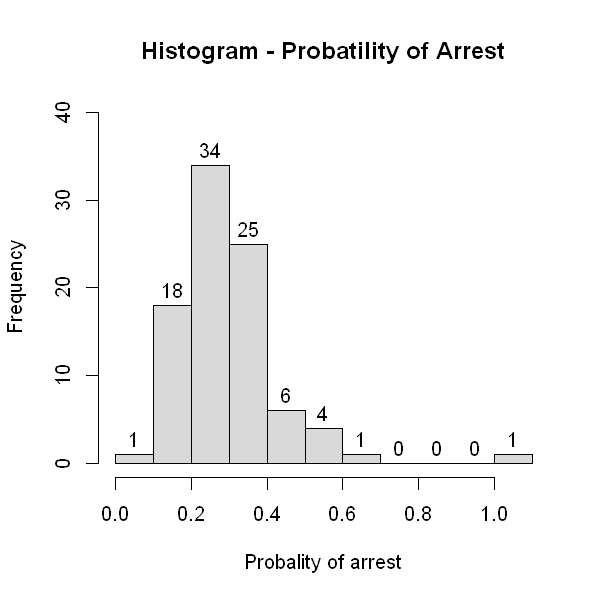

In [381]:
options(repr.plot.width=5, repr.plot.height=5)
hist(clean$prbarr, main = "Histogram - Probatility of Arrest", xlab = "Probality of arrest", 
     labels = TRUE, ylim = c(0, 40), col = rgb(0.5, 0.5, 0.5, 0.3))
clean[clean$prbarr > 1, ]

##### Prbconv

`prbconv` is being imported into R as a factor, when it should be numeric, which is likely caused by the '\`' value. Since we have removed this value already, we can now recast this variable as as numeric.

In [38]:
# Remove ` and cast the class to numeric
clean$prbconv <- as.numeric(as.character(clean$prbconv))

Summarizing this variable, we found that there are 10 observations with values higher than 1 and one of them with a value higher than 2. Despite these values being unusually high they are possible for the same reasons exposed in the case of `prbarr`. Furthermore, in the case of `prbconv` the lag between the arrest and the end of a trial is likely even longer than in the lag of `prbarr`. Therefore, since we don't have additional information on the definition used to build this variable and no way to validate which specific definition was used using numerical methods, we will not clean these 10 values.

In [73]:
paste("Summary statistics - Probability of conviction")
summary(clean$prbconv)
paste("Number of observations higher than 1:", length(clean$prbconv[clean$prbconv > 1]))
clean[clean$prbconv > 1, ]

[1] "Summary statistics - Probability of conviction"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06838 0.34422 0.45170 0.55086 0.58513 2.12121 

[1] "Number of observations higher than 1: 10"

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
2,3,87,0.0152532,0.132029,1.48148,0.450000,6.35,0.00074588,1.0463320,26.89208,0,1,0,7.91632,255.1020,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
10,19,87,0.0221567,0.162860,1.22561,0.333333,10.34,0.00202425,0.5767442,61.15251,0,0,0,24.31170,260.1381,613.2261,191.2452,290.5141,266.0934,567.06,403.15,258.33,299.44,0.05334728,0.07713232
44,99,87,0.0171865,0.153846,1.23438,0.556962,14.75,0.00185912,0.5478615,39.57348,1,0,0,14.28460,259.7841,417.2099,168.2692,301.5734,247.6291,258.99,442.76,387.02,291.44,0.01960784,0.12894706
51,115,87,0.0055332,1.090910,1.50000,0.500000,20.70,0.00905433,0.3858093,28.19310,1,0,0,1.28365,204.2206,503.2351,217.4908,342.4658,245.2061,448.42,442.20,340.39,386.12,0.10000000,0.07253495
56,127,87,0.0291496,0.179616,1.35814,0.335616,15.99,0.00158289,1.3388889,32.02376,0,0,0,34.27990,290.9091,426.3901,257.6008,441.1413,305.7612,329.87,508.61,380.30,329.71,0.06305506,0.07400288
61,137,87,0.0126662,0.207143,1.06897,0.322581,6.18,0.00081426,0.3167155,44.29367,0,0,0,33.04480,299.4956,356.1254,170.8711,170.9402,250.8361,192.96,360.84,283.90,321.73,0.06870229,0.07098370
67,149,87,0.0164987,0.271967,1.01538,0.227273,14.62,0.00151871,0.6092437,29.03402,1,0,0,10.00460,223.6136,437.0629,188.7683,353.2182,210.4415,289.43,421.34,342.92,301.23,0.11682243,0.06215772
84,185,87,0.0108703,0.195266,2.12121,0.442857,5.38,0.00122210,0.3887588,40.82454,0,1,0,64.34820,226.8245,331.5650,167.3726,264.4231,2177.0681,247.72,381.33,367.25,300.13,0.04968944,0.07008217
90,195,87,0.0313973,0.201397,1.67052,0.470588,13.02,0.00445923,1.7459893,53.66693,0,0,0,37.43110,315.1641,377.9356,246.0614,411.4330,296.8684,392.27,480.79,303.11,337.28,0.15612382,0.07945071
91,197,87,0.0141928,0.207595,1.18293,0.360825,12.23,0.00118573,0.8898810,25.95258,1,0,0,5.46081,314.1660,341.8803,182.8020,348.1432,212.8205,322.92,391.72,385.65,306.85,0.06756757,0.07419893


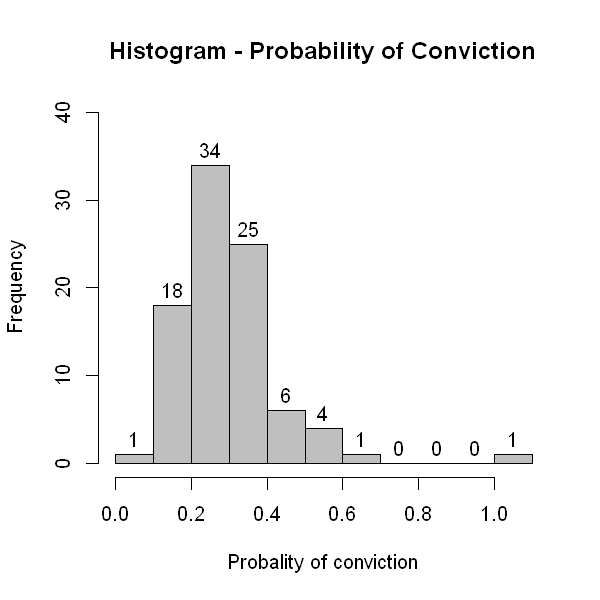

In [382]:
hist(clean$prbarr, main = "Histogram - Probability of Conviction", xlab = "Probality of conviction",
     labels = TRUE, ylim = c(0, 40), col = rgb(0.5, 0.5, 0.5, 0.5))

##### Probability of prison

Probability of prison spreads over a reasonable range (between 0.15 fand 0.6) and does not seem to have unusually high concentrations around certain values that would lead us to suspect measurement errors. Furthermore, the distribution of this variable is symmetric with particular features that we need to take into account when building our model.

It is interesting to note that, unlike probability of arrest and conviction, this variable does not have unusually large values, which further supports our suspicion that the numerator and denominator of these two variables correspond in part to data from different periods, given the existing lag between the time a crime is commited and an arrest is made, and the lag between an arrest and the end of a trial. In contrast, there is practically no lag between the time a conviction is made and the time a decision to send the convict to prison is made.

In [81]:
paste("Summary statistics - Probability of prison")
summary(clean$prbpris)

[1] "Summary statistics - Probability of prison"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1500  0.3642  0.4222  0.4106  0.4576  0.6000 

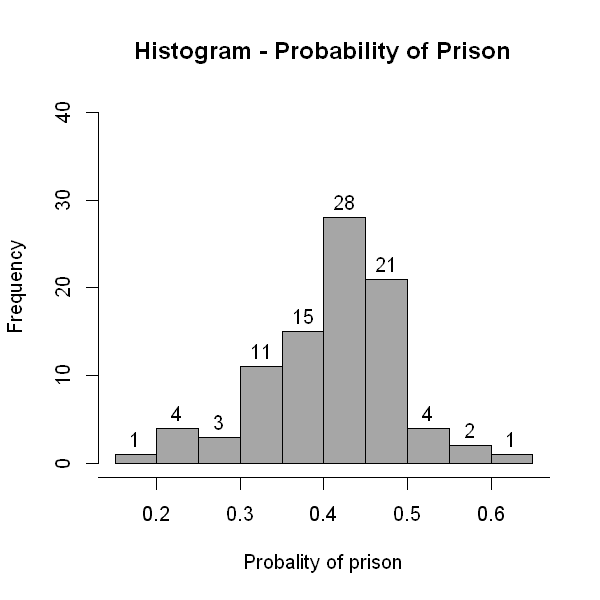

In [463]:
hist(clean$prbpris, main = "Histogram - Probability of Prison", xlab = "Probality of prison", 
     labels = TRUE, ylim = c(0, 40), col = rgb(0.5, 0.5, 0.5, 0.7))
axis(side = 1, at = seq(0, 1, 0.2))

##### Average sentence

The average sentence ranges between 5.3 and 20.7 days, with a mean of 9.7 days. These are all very small numbers which may indicate that this variable is defined as

$$\frac{1}{\text{Number of convictions}}\sum_{i=1}^n{\text{Number of days of prison}}$$

This means that the average is not taken only over the convictions that led to prison sentences, but over all convictions, including many $0$ values where there should be `NA`s.

This definition is problematic for our purposes for two reasons:

1. `avgsen` may have a high collinearity with `prbpris` because a higher probability of prison will likely be associated with higher average sentences. This will obfuscate the difference between these two variables, which are both of interest to the campaing, and will decrease the efficiency of the estimators, making it harder to assess their statistical significance.
2. One of the questions of interest to the campaign is whether higher sentences will lead to lower crime. Given that the majority of sentences do not result in prison time (the probability of being sentenced is 41% on average), the average sentence will be mainly driven all these 0 values and will not provide useful information on the sentences that result in prison.

However, the guiding documentation does not provide a definition of how this variable is calculated, and we don't have other ways to deduce what definition was used. Therefore, we will assume for the moment that the above is the definition that was used and will not transform this variable, since we didn't find evidence of measurement errors, and its distribution doesn't show skewness, atypical values or unusually high concentrations of observations around certain values.

In [471]:
mean(clean$prbpris)

[1] 0.4106256

In [183]:
paste("Summary statistics - Average sentence")
summary(clean$avgsen)

[1] "Summary statistics - Average sentence"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.380   7.375   9.110   9.689  11.465  20.700 

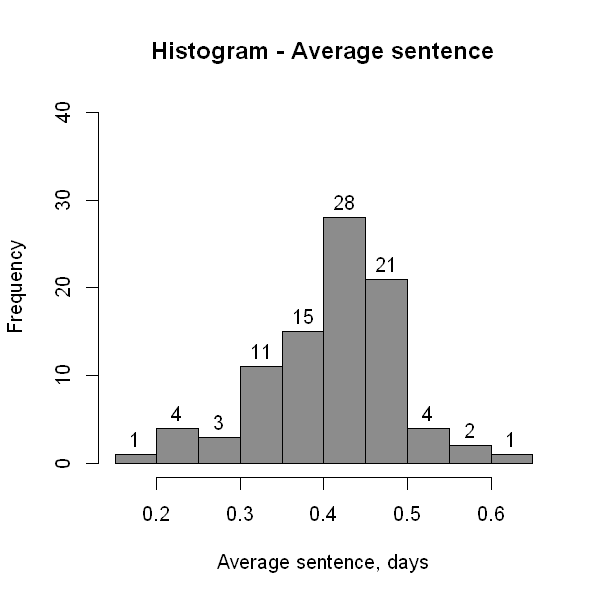

In [386]:
hist(clean$prbpris, main = "Histogram - Average sentence", xlab = "Average sentence, days", 
     labels = TRUE, ylim = c(0, 40), col = rgb(0.5, 0.5, 0.5, 0.9))

#### Control variables

##### Tax per capita

`taxpc`'s distribution is particularly atypical because it seems to be truncated at values lower than 25.69, it is positively skewed, its range comprises more than one order of magnitude and it is unusually concentrated at values between 30 and 40.

To further explore the reason for this distribution we focused on the range of observations with values between 30 and 40 but we didn't find particularly high concentrations of observations around certain values that indicate measurement errors in the data. Therefore, we moved to test whether some transformations would yield a better behavior in this variable.

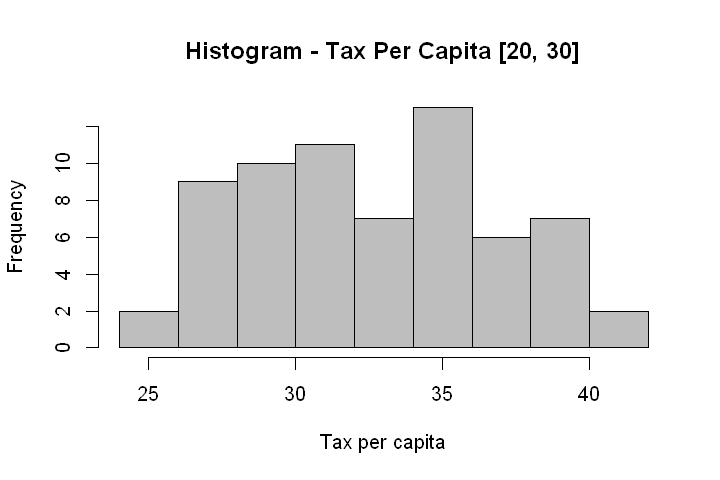

In [250]:
hist(clean$taxpc[clean$taxpc < 41 & clean$taxpc > 19], main = "Histogram - Tax Per Capita [20, 30]",
    xlab = "Tax per capita", col = 'gray')

After trying different transformation, we found that none of their distribution is particularly different than the original variable. However, `log(taxpc)` shows less concentration of observations, a lower range and might be more meaningful when interpreting the results of our model. Therefore, we will include this transformation in our bivariate analysis.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.69   30.73   34.92   38.16   41.01  119.76 

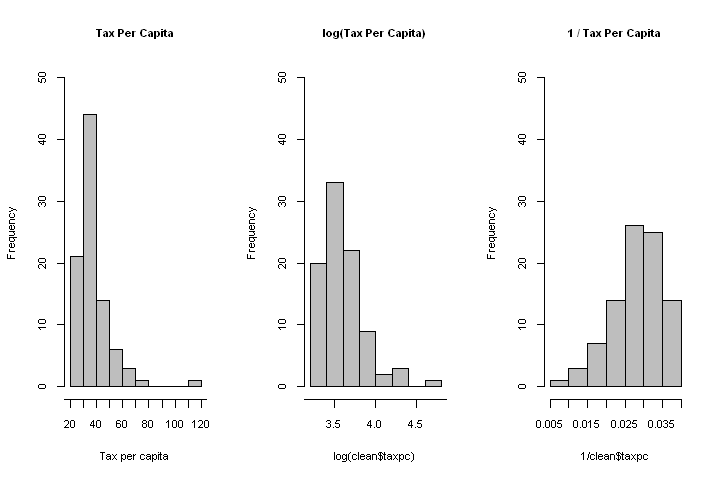

In [254]:
summary(clean$taxpc)
par(mfrow = c(1, 3), cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.8)
hist(clean$taxpc, breaks = sqrt(nrow(clean)), col="grey", main = "Tax Per Capita", xlab = "Tax per capita", ylim = c(0, 50))
axis(side = 1, at = seq(0, 130, 10))
hist(log(clean$taxpc), col="grey", main = "log(Tax Per Capita)", breaks = sqrt(nrow(clean)), ylim = c(0, 50))
axis(side = 1, at = seq(0, 6, 0.5))
hist(1/clean$taxpc, col="grey", main = "1 / Tax Per Capita", breaks = sqrt(nrow(clean)), ylim = c(0, 50))

##### Regions

The first thing to notice in the regions variables (i.e. `west` and `central`) is the apparent abscence of at least one region (`east`) in the dataset. The fact that some observations have a value $0$ in both `west` and `central` also indicates that there is at least one regional variable missing which could be a potential source of bias because it is likely to capture regional variations that we will be capturing only partially using the two variables available. Even though we could assume that there is indeed only three regions (the Wikipedia entry of this topic contains three regions [source](https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States#North_Carolina)), we cannot be sure that this is indeed the definition that was used in the dataset.

Furthermore, we found that there is one observation (county 71) with value 1 in both `west` and `central`, which is likely a mistake. Since we don't have a way to internally validate to which region this county belongs to, we replaced these two values with `NA`.

In [103]:
clean[clean$west + clean$central > 1, ]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
33,71,87,0.0544061,0.243119,0.22959,0.379175,11.29,0.00207028,4.834734,31.53658,1,1,0,13.315,291.4508,595.3719,240.3673,348.0254,295.2301,358.95,509.43,359.11,339.58,0.1018608,0.07939028


In [107]:
clean$west[clean$county == 71] <- NA
clean$central[clean$county == 71] <- NA

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
33,71,87,0.0544061,0.243119,0.22959,0.379175,11.29,0.00207028,4.834734,31.53658,NA,NA,0,13.315,291.4508,595.3719,240.3673,348.0254,295.2301,358.95,509.43,359.11,339.58,0.1018608,0.07939028


##### Other variables

Upon inspecting other variables at a high level, we didn't find evidence of errors or other specially relevant features that needed to be taken into account into the model that we will build to answer our research question. The values in these variables were within reasonable ranges, there were no missing values and there were not unusually high concentrations of observations around certain values. Therefore, all the other variables that were not mentioned above were not transformed.

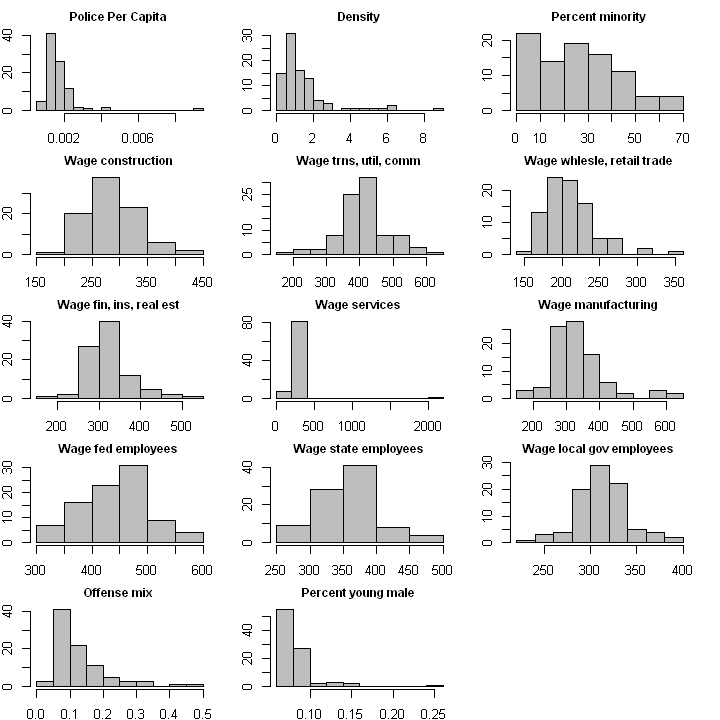

In [359]:
options(repr.plot.width=6, repr.plot.height=6)
par(mfrow = c(5, 3), mar = c(1,1,1,1)+0.9, cex.main = 0.9)
hist(clean$polpc, breaks="FD", col="grey", main = "Police Per Capita")
hist(clean$density, breaks="FD", col="grey", main = "Density")
hist(clean$pctmin80, col="grey", main = "Percent minority")
hist(clean$wcon, col="grey", main = "Wage construction")
hist(clean$wtuc, col="grey", main = "Wage trns, util, comm")
hist(clean$wtrd, col="grey", main = "Wage whlesle, retail trade")
hist(clean$wfir, col="grey", main = "Wage fin, ins, real est")
hist(clean$wser, col="grey", main = "Wage services")
hist(clean$wmfg, col="grey", main = "Wage manufacturing")
hist(clean$wfed, col="grey", main = "Wage fed employees")
hist(clean$wsta, col="grey", main = "Wage state employees")
hist(clean$wloc, col="grey", main = "Wage local gov employees")
hist(clean$mix, col="grey", main = "Offense mix")
hist(clean$pctymle, col="grey", main = "Percent young male")

## 2.3. Bivariate analysis

#### Quick import and clean

In [264]:
crime <- read.csv('crime_v2.csv')
clean <- crime[complete.cases(crime),]
clean <- clean[!duplicated(clean),]
clean$prbconv <- as.numeric(as.character(clean$prbconv))
clean$west[clean$county == 71] <- NA
clean$central[clean$county == 71] <- NA
clean$log.crmrte <- log(clean$crmrte)
clean$log.taxpc <- log(clean$taxpc)

#### Variables of interest

In [267]:
vars.interest <- c("crmrte", "log.crmrte", "prbarr", "prbconv", "prbpris", "avgsen")

Scatterplot matrix

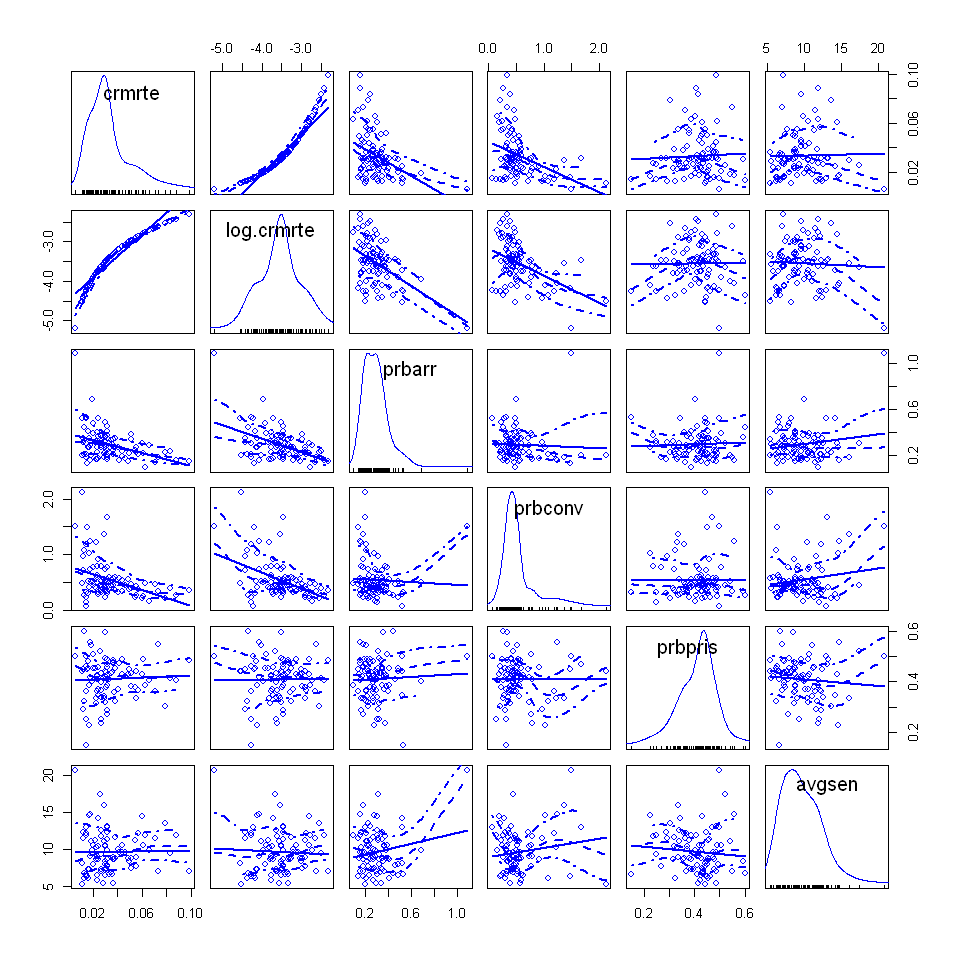

In [272]:
options(repr.plot.width=8, repr.plot.height=8)
scatterplotMatrix(clean[, vars.interest])

Correlation analysis

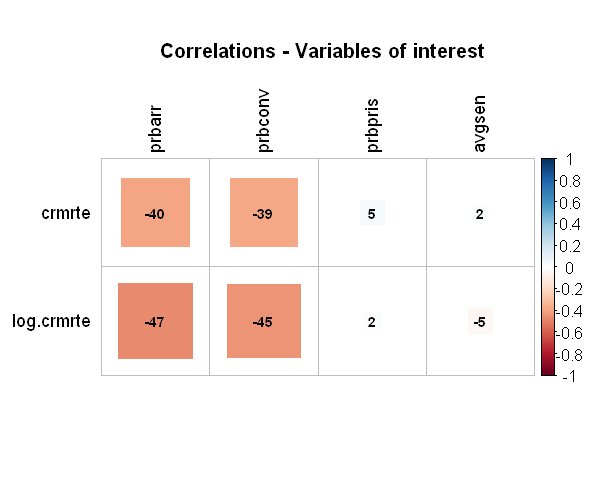

In [348]:
library(dplyr)
library(corrplot)

# Add transformed variables
clean$prbconv.inv <- 1/clean$prbconv
clean$crmrte.log <- log(clean$crmrte)


# Compute correlations
crime.corrs <- cor(select(clean, vars.interest))[1:2, 3:6]

# Plot correlations
options(repr.plot.width=5, repr.plot.height=4)
corrplot(crime.corrs, method = 'square',  order = 'original', diag = T, addCoef.col = T,
         tl.col = 'black', tl.cex = 0.9, addCoefasPercent = T, number.cex = 0.7)
title("Correlations - Variables of interest", cex.main = 1)

Regression analysis

In [462]:
paste("R-squared (%) for variables of interest")

# Probability arrest
paste("crmrte = prbarr:", round(summary(lm(crmrte ~ prbarr, data = clean))$r.squared * 100, 2), "%")
paste("log(crmrte) = prbarr:", round(summary(lm(log(crmrte) ~ prbarr, data = clean))$r.squared * 100, 2), "%")

# Probability of conviction
paste()
paste("crmrte = prbconv:", round(summary(lm(crmrte ~ prbconv, data = clean))$r.squared * 100, 2), "%")
paste("log(crmrte) = prbconv:", round(summary(lm(log(crmrte) ~ prbconv, data = clean))$r.squared * 100, 2), "%")

# Average sentence
paste()
paste("crmrte = avgsen:", round(summary(lm(crmrte ~ avgsen, data = clean))$r.squared * 100, 2), "%")
paste("crmrte = avgsen$^2$:", round(summary(lm(crmrte ~ I(avgsen^2), data = clean))$r.squared * 100, 2), "%")
paste("log(crmrte) = avgsen$^2$:", round(summary(lm(log(crmrte) ~ I(avgsen^2), data = clean))$r.squared * 100, 2), "%")

# Probability of prison
paste()
paste("crmrte = prbpris:", round(summary(lm(crmrte ~ prbpris, data = clean))$r.squared * 100, 2), "%")
paste("crmrte = prbpris$^2$:", round(summary(lm(crmrte ~ I(prbpris^2), data = clean))$r.squared * 100, 2), "%")
paste("log(crmrte) = prbpris$^2$:", round(summary(lm(log(crmrte) ~ I(prbpris^2), data = clean))$r.squared * 100, 2), "%")

[1] "R-squared (%) for variables of interest"

[1] "crmrte = prbarr: 15.62 %"

[1] "log(crmrte) = prbarr: 22.35 %"

character(0)

[1] "crmrte = prbconv: 14.9 %"

[1] "log(crmrte) = prbconv: 19.96 %"

character(0)

[1] "crmrte = avgsen: 0.04 %"

[1] "crmrte = avgsen$^2$: 0.11 %"

[1] "log(crmrte) = avgsen$^2$: 1.58 %"

character(0)

[1] "crmrte = prbpris: 0.23 %"

[1] "crmrte = prbpris$^2$: 0.02 %"

[1] "log(crmrte) = prbpris$^2$: 0.04 %"

#### Control variables

In [308]:
vars.control <- c('polpc', 'density', 'west', 'central', 'taxpc', 'log.taxpc')

Scatterplot matrix

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"

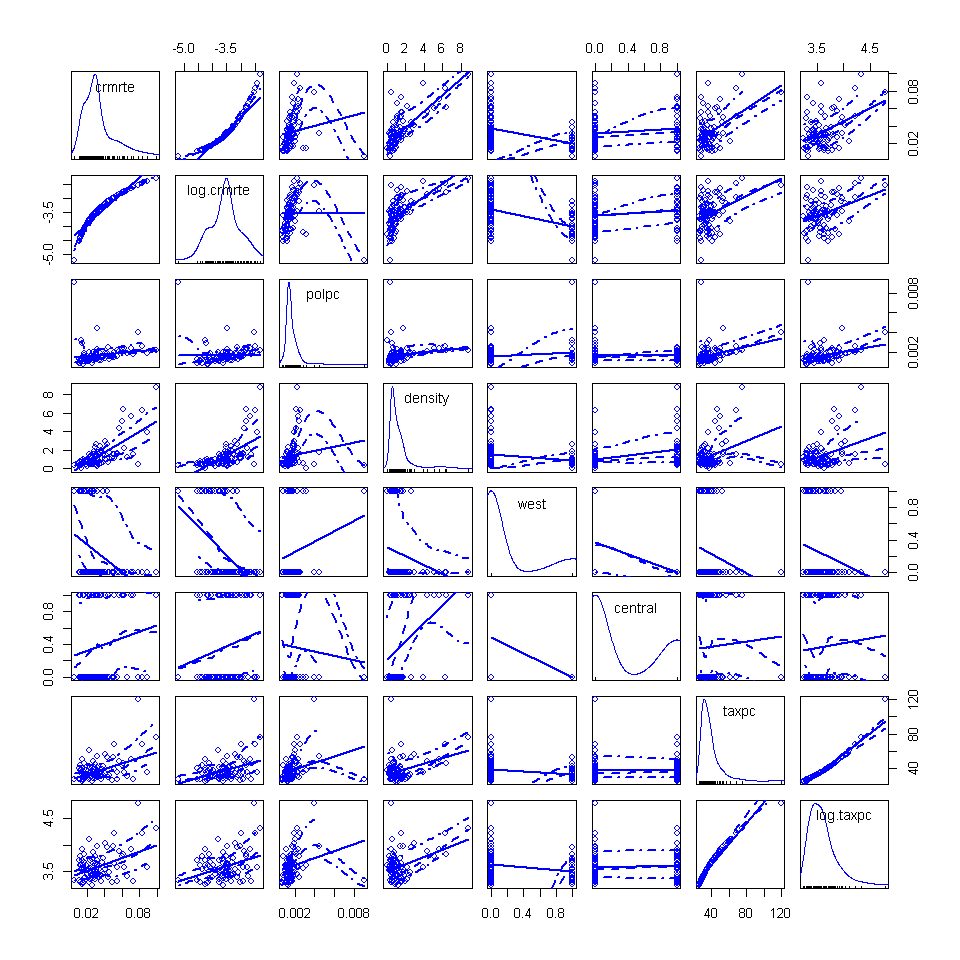

In [360]:
options(repr.plot.width=8, repr.plot.height=8)
scatterplotMatrix(clean[, c('crmrte', 'log.crmrte', vars.control)])

Correlation analysis

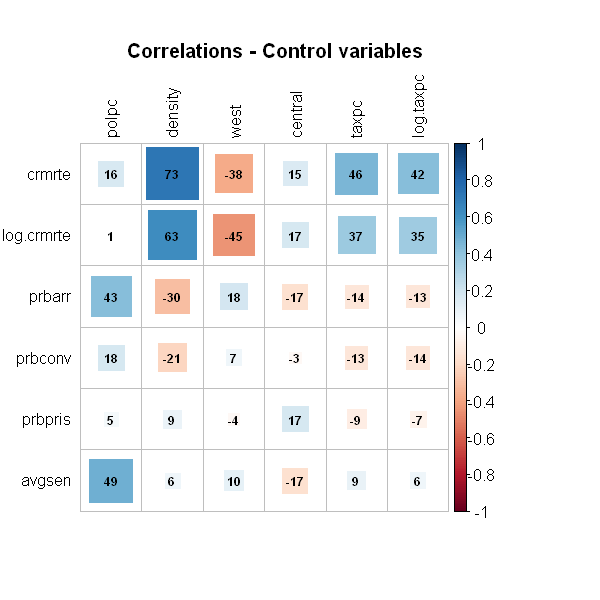

In [355]:
corrs.control <- cor(clean[, c(vars.interest, vars.control)], use = 'complete.obs')[1:6, 7:12]

options(repr.plot.width=5, repr.plot.height=5)
par(oma = c(0,0,0,4))
corrplot(corrs.control, method = 'square',  order = 'original', diag = T, addCoef.col = T,
         tl.col = 'black', tl.cex = 0.8, addCoefasPercent = T, number.cex = 0.6)
title("Correlations - Control variables", cex.main = 1)

# Regression analysis (old)

### Model 1: explanatory variables of key interest

In [ ]:
model1.1 <- lm(crmrte ~ prbarr + prbconv + polpc + taxpc + wcon + wtrd + wfed, data = clean)
model1.1$coefficients
paste("R-squared:", round(summary(model1.1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1.1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1.1), 0))

Coefficients for wages are very low so may be irrelevant. They are also not correlated with the other predictors so are not confounding variables. I will change the specification to remove these.

In [ ]:
model1.2 <- lm(crmrte ~ prbarr + prbconv + polpc + taxpc, data = clean)
model1.2$coefficients
paste("R-squared:", round(summary(model1.2)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1.2)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1.2), 0))

Change prbcon to prbconv.inv

In [ ]:
model1.3 <- lm(crmrte ~ prbarr + prbconv.inv + polpc, data = clean)
model1.3$coefficients
paste("R-squared:", round(summary(model1.3)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1.3)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1.3), 0))

**Conclusion**: the model that explains better the variation of `crmrte` and has the lowest value of Akaike Information Criterion is model1.1

### Model 2: variables of interest + variables that increase accuracy

Started with model 1.1 and added the confounding variables + `west` (increases both R-squared and AIC)

In [ ]:
model2.1 <- lm(crmrte ~ county + prbarr + prbconv + polpc + taxpc + wcon + wtrd + wfed + density + urban + west, data = clean)
model2.1$coefficients
paste("R-squared:", round(summary(model2.1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model2.1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model2.1), 0))

### Model 3: variables of interest + variables that increase accuracy + All other variables

In [ ]:
model3.1 <- lm(crmrte ~ prbarr + prbconv + polpc + taxpc + wcon + wtrd + wfed + density
               + urban + county + prbpris + avgsen + west + central + urban + pctmin80 
               + wtuc + wfir + wser + wmfg + wsta + wloc + mix + pctymle, data = clean)
model3.1$coefficients
paste("R-squared:", round(summary(model3.1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model3.1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model3.1), 0))

### Comparison of models

In [ ]:
library(stargazer)

In [ ]:
stargazer(model1.1, model2.1, model3.1, type = "html", 
          report = "vc",
          title = "Linear Models Predicting Crime Rate",
          keep.stat = c("rsq", "n"),
          omit.table.layout = "n")

<table style="text-align:center"><caption><strong>Linear Models Predicting Crime Rate</strong></caption>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="3"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="3" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="3">crmrte</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">county</td><td></td><td>0.00002</td><td>0.00001</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">prbpris</td><td></td><td></td><td>0.004</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">avgsen</td><td></td><td></td><td>-0.0004</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">prbarr</td><td>-0.065</td><td>-0.049</td><td>-0.051</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">prbconv</td><td>-0.022</td><td>-0.019</td><td>-0.019</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">polpc</td><td>6.346</td><td>5.855</td><td>6.867</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">taxpc</td><td>0.0003</td><td>0.0001</td><td>0.0002</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wcon</td><td>0.00000</td><td>-0.00000</td><td>0.00002</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wtrd</td><td>0.00005</td><td>-0.00002</td><td>0.00003</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wfed</td><td>0.0001</td><td>0.00003</td><td>0.00003</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">density</td><td></td><td>0.004</td><td>0.005</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">urban</td><td></td><td>0.005</td><td>0.0003</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">west</td><td></td><td>-0.010</td><td>-0.003</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">central</td><td></td><td></td><td>-0.004</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">pctmin80</td><td></td><td></td><td>0.0003</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wtuc</td><td></td><td></td><td>0.00001</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wfir</td><td></td><td></td><td>-0.00003</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wser</td><td></td><td></td><td>-0.00000</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wmfg</td><td></td><td></td><td>-0.00001</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wsta</td><td></td><td></td><td>-0.00002</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wloc</td><td></td><td></td><td>0.00001</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">mix</td><td></td><td></td><td>-0.019</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">pctymle</td><td></td><td></td><td>0.100</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">Constant</td><td>-0.002</td><td>0.029</td><td>0.014</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Observations</td><td>90</td><td>90</td><td>90</td></tr>
<tr><td style="text-align:left">R<sup>2</sup></td><td>0.653</td><td>0.775</td><td>0.855</td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr></table>

### Other thoughts

- We should define our audience: political campaign for governonr of the State? for President? for Senate/House or reps?
- Add bibliography
- The omision of other location variables besides `west` and `central` may be a source of omitted variable bias (create an `east` variable?)
- Analysis of assumptions